 # <center>Final Exam &ndash; DATA 3401 (Fall 2022)</center>

## Start Date: 12/5
## Due Date: 12/14 (at 1:30pm) &ndash; this is a hard deadline so don't miss it!

## Final Rules
This final exam is simliar to the midterm exam. Please work the exercises below **on your own**.  When you have completed the exam, you should push your completed jupyter notebook to your GitHub repo for this class in the **Exams->Final** folder.

You may not discuss the problems with **anyone else**, including persons on an online internet forum. Consulting an outside source like this will be considered an academic integrity violation. **Any questions should be referred to me.**

You may use all class resources including previous labs and lectures, and anything posted on the course GitHub repo. 

You may not use any function that trivializes a problem. For example, if I ask you to write a `max` function that computes the maximum entry in a list, you are not allowed to use the pre-defined Python function `max`; you must write your own.

Each problem below will be worth approximately 25 points, and the Bonus will be worth 10. Achieving over 100 on this exam is possible if the Bonus is completed.

## Exercise 1
In this exercise you will be working with the files abalone.names and abalone.data in the Final Exam folder.

1. Open the abalone.names file in your notebook. Using the information there, in a new cell briefly describe the data set and relevant features.
1. Load the abalone.data file into a dataframe using pandas. Print the .head() of the dataframe
1. Using the .names file, **add** a header line to your dataframe describing each column of data
1. Take the last column and make a new dataframe called `labels`
    1. Print out the value counts of each label.
    1. What do you notice about the distribution of the labels?
    1. Based on your observations, propose a way to modify the labels to consolidate some of the classes, and do this modification (you should describe in comments in your code what change you are making)
    1. After making your modification, show the value counts of the new labels again
1. Make a scatterplot of each feature against the others (it should be a single plot)
    1. Describe any trends or correlations that you see.
1. As in the Titanic lecture and previous lab, plot 2 stacked histograms of any features you like, color coded by the label. Describe any trends you see.

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
# 1.)
aba_names= open("abalone.names", "r")
print(aba_names.read())


1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

2.)
This dataset is based on the physical properties and measurements of marine snails. We are looking at at things like the Snail's weight, with or without the shell, diameter of their shell, # of rings, etc. to determine the Abalone age. 

In [3]:
#3.)
data_abalone = pd.read_csv('abalone.data', header=None)
data_abalone.columns= ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
data_abalone.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#4A.)
data_abalone.iloc[0,:]


Sex                    M
Length             0.455
Diameter           0.365
Height             0.095
Whole Weight       0.514
Shucked Weight    0.2245
Viscera Weight     0.101
Shell Weight        0.15
Rings                 15
Name: 0, dtype: object

In [5]:
data_abalone.replace(('M','F','I'),(1,0,2), inplace=True)
data_abalone.columns= ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
data_abalone.head()



,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


4B.) I notice in this distribution that there are a lot of varying types of weight for the Abalone, I'm not too sure how relevant they are but they all add up to resemble the whole weight number. 


4C.) 
I believe there are too many weight categories, and they should just be combined into just two categories. I have decided to keep the whole and shell weight, as these seem to offer the most readability.



In [6]:
new_data = data_abalone.drop(['Viscera Weight','Shucked Weight'],axis=1)


In [7]:
new_data.iloc[-1][:]

Sex              1.0000
Length           0.7100
Diameter         0.5550
Height           0.1950
Whole Weight     1.9485
Shell Weight     0.4950
Rings           12.0000
Name: 4176, dtype: float64

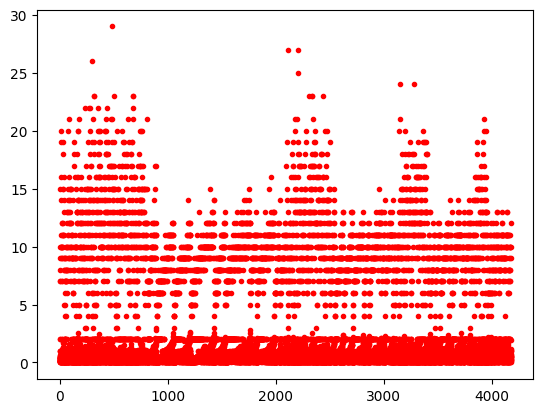

In [8]:
#5.)
#Its really difficult to analyze the new data frame, so im storing each label. 

sex = new_data.iloc[:,0]
length =  new_data.iloc[:,1]
diameter =  new_data.iloc[:,2]
height =  new_data.iloc[:,3]
whole_weight =  new_data.iloc[:,4]
shell_weight =  new_data.iloc[:,5]

labels = new_data.iloc[:,-1]

x = np.array(new_data)
y = np.array(labels)



plt.plot(x,'r.')
#plt.plot(y,'g.')
plt.show()

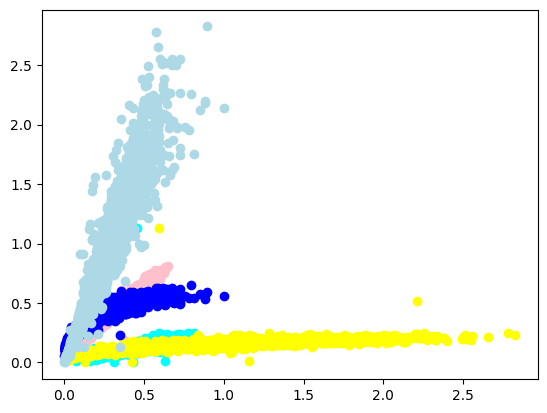

In [9]:
#testing for different combinations
x = np.array(length)
y= np.array(height)
plt.scatter(x,y,color='cyan')

x = np.array(diameter)
y= np.array(length)
plt.scatter(x,y,color='pink')

x = np.array(whole_weight)
y= np.array(height)
plt.scatter(x,y,color='yellow')

x = np.array(shell_weight)
y= np.array(diameter)
plt.scatter(x,y,color='blue')

x = np.array(shell_weight)
y= np.array(whole_weight)
plt.scatter(x,y,color='lightblue')
plt.show()



I have represented each column except for rings and sex because they aren't very important to graph (For sex you only get a range of 1-2, by my design and with rings its a static number also.)

some correlations I have found are that when combined shell and whole weight make for the widest distribution of values, meanwhile shell weight and diameter are the most concentrated.


In [10]:
#6.)

weightstr = new_data.iloc[:,4]

for i in weightstr:
    if i >= 1:
        weightstr.replace((i), ('greater than 1'), inplace=True)
    if i < 1:
        weightstr.replace((i), ('lesser than 1'), inplace=True)
        
weightstr

0        lesser than 1
1        lesser than 1
2        lesser than 1
3        lesser than 1
4        lesser than 1
             ...      
4172     lesser than 1
4173     lesser than 1
4174    greater than 1
4175    greater than 1
4176    greater than 1
Name: Whole Weight, Length: 4177, dtype: object

       1    0     2
Sex  730  693    49
Sex  798  614  1293
                  1    0     2
Greater than 1  730  693    49
Less than 1     798  614  1293


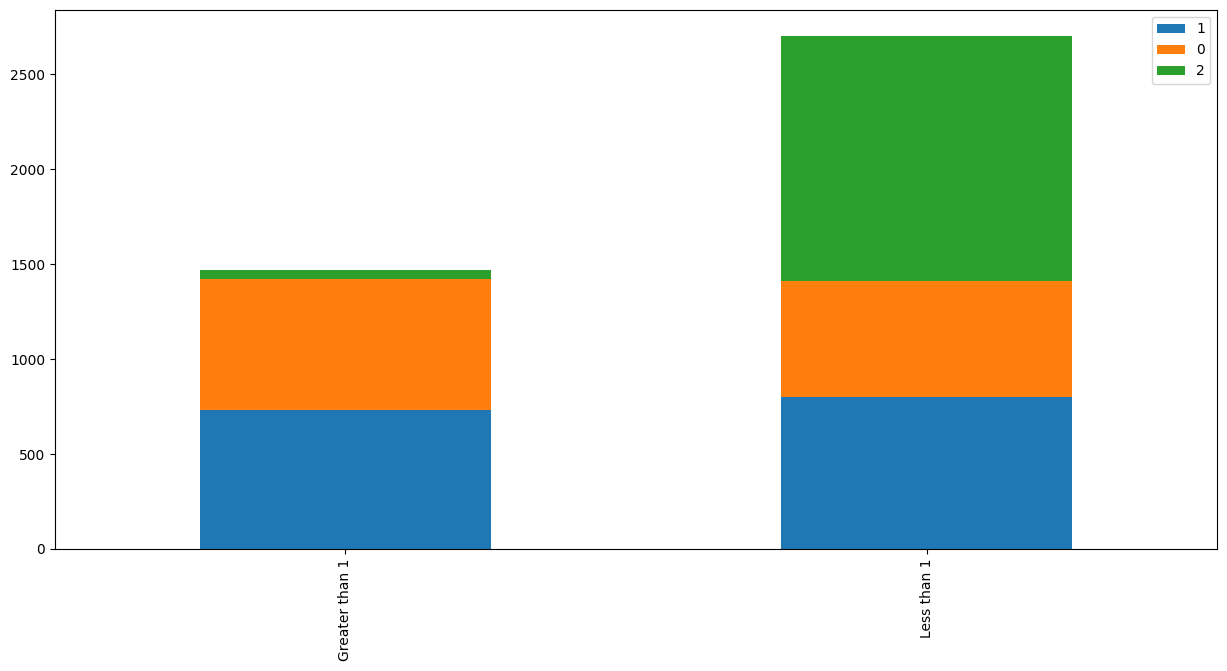

In [11]:
Greater = new_data[new_data['Whole Weight']=='greater than 1']['Sex'].value_counts()
Lesser = new_data[new_data['Whole Weight']=='lesser than 1']['Sex'].value_counts()
histdf  = pd.DataFrame([Greater,Lesser])
print(histdf)
histdf.index = ['Greater than 1', 'Less than 1']
print(histdf)
histdf.plot(stacked=True,figsize=(15,7),kind='bar')
plt.show()

## Exercise 2
If you invest a principal value of $P$ at time 0, and interest is continuously compounded at a rate $r$ (between 0 and 1), then the amount of money you would have after $t$ years is
$$M(t) = Pe^{rt}.$$
Fry has \\$0.01 in his bank account, but is accidentally transported 1,000 years into the future. He returns to his bank (which luckily still exists) to see how much money he now has. Assume Fry's account earns continuously compounded interest at a rate of 5\% (or $r=0.05$).
1. Create a numpy array of time from 0 to 1,000 years increasing by 1 year
1. Create a new numpy array that calculates how much money Fry's account has at each year
1. Plot Fry's money over the given timeframe

Now if Fry only earned simple interest, the amount of money he would have after $t$ years would be
$$ S(t) = P(1+rt).$$

1. Perform the same procedure as steps 1-3 above assuming Fry earns 5\% simple interest.
1. To illustrate the difference, also plot $M(t)-S(t)$ over the timeframe.
1. What do you conclude?

*Aside:* This problem, while silly, should teach you an important lesson: invest your money as early as you possibly can!

[1.00000000e-02 1.05127110e-02 1.10517092e-02 ... 4.69131556e+19
 4.93184446e+19 5.18470553e+19]


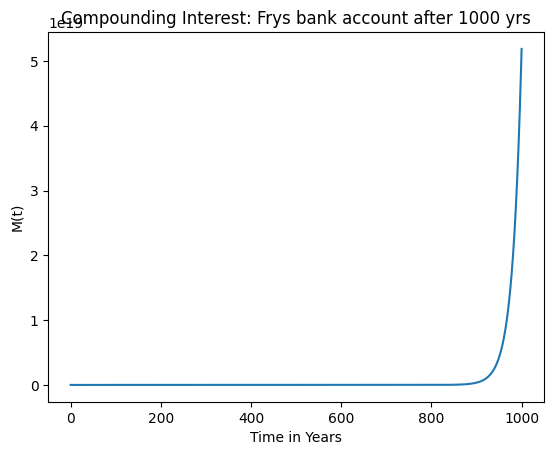

In [12]:
t = np.arange(1001)
p = .01
rt = (.05)*t
e = np.exp(rt)
m_t = p*e
print(m_t)

plt.plot(m_t)
plt.title('Compounding Interest: Frys bank account after 1000 yrs')
plt.xlabel("Time in Years")
plt.ylabel("M(t)")
plt.show()


[0.01   0.0105 0.011  ... 0.509  0.5095 0.51  ]


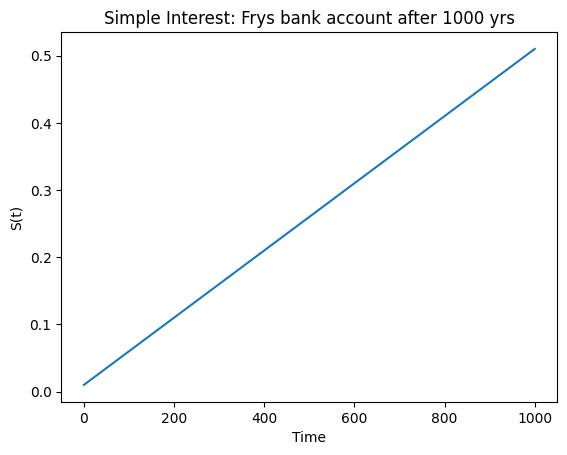

In [16]:
p2= .01
t2 = np.arange(1001)
rt2 = .05*t
s_t = ((1+rt2))*p2
plt.plot(s_t)
print(s_t)
plt.title('Simple Interest: Frys bank account after 1000 yrs')
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.show()

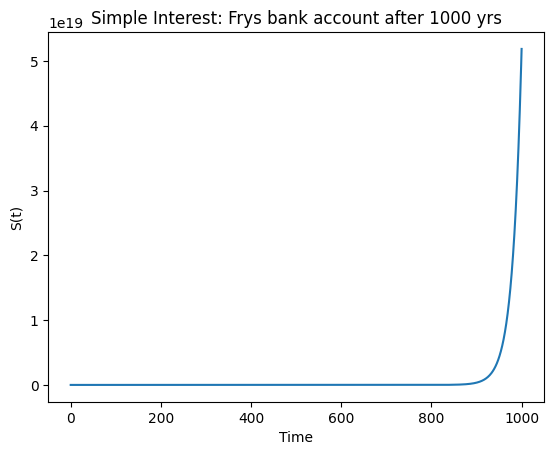

In [17]:
d = m_t-s_t

plt.plot(d)

plt.title('Simple Interest: Frys bank account after 1000 yrs')
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.show()

The key differences between Compounding and Simple interest, is the difference between exponential and linear equations. An exponential function, as you can see, over time increases Fry's money quicker as it builds.

Linear functions work fairly well with a larger principle value, but with 1 cent it equates to nothing even over 1000 years.  

the simple interest function, when deducted from the compounded interest, essentially does nothing to it. This is because with 1 cent, over 1000 years, it becomes 51 cents with simple interest. 51 cents subtracted from fifty-one quintillion eight hundred quadrillion (big boy number), is functionally equivalent to subtracting 1 from infinity. 

## Exercise 3
In Lab 7 you coded a random walk in 1-dimension. Here you will code a 2-dimensional random walk.  
1. As before, write a function `random_walk(num_steps,init_position)` that takes an integer for `num_steps` corresponding to how many steps the random walker will take, and a numpy array for `init_position` with x and y coordinates of the starting point. The function should return the full sequence of positions of the walker as they take `num_steps` steps
1. To determine the next location of the walker at a given step, the walker uniformly randomly chooses to walk one of 4 possible directions: up, down, left, or right and takes a step of length 1 in either direction (e.g., if the walker starts at (0,0), their possible moves for the first step are up=(0,1), down=(0,-1), left=(-1,0), right=(1,0))
1. Call your `random_walk` function 5 times with initial position of (0,0) and 10,000 steps and plot the random walk for each function call using pyplot (here is an example of what it should look like; if the image does not render in GitHub, open 2drandomwalk.png in the Final folder)
![2drandomwalk.png](2drandomwalk.png)
1. What do you notice?
1. Modify your random walk such that the walker is more likely to travel up (specifically, they will step up with probability .7 and the remaining directions each with probability .1).
1. Call your modified random walk function 5 times and plot the results.
1. What do you notice? Is there a difference in behavior compared to the original version?

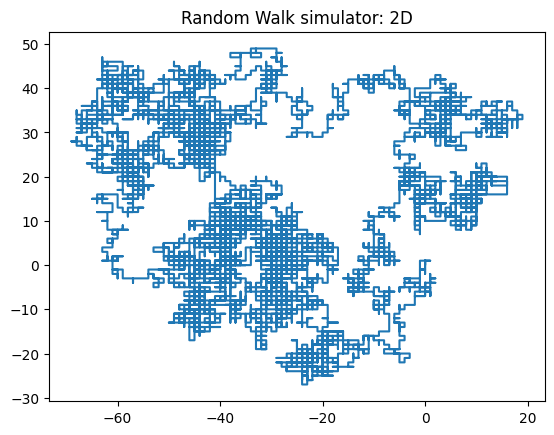

In [80]:


def Random_Walk_2D(num_steps, start_position):
    controls = ['Up','Down','Left', 'Right']
    #storing coordinates
    y_0 = np.zeros(num_steps)
    y = y_0 + start_position
    x_0 = np.zeros(num_steps)  
    x= x_0 + start_position
    
    for i in range(num_steps):
        pick_step = np.random.choice(controls)
        if pick_step == 'Up':
            x[i] = x[i-1]
            y[i] = y[i-1]+1
        elif pick_step == 'Down':
            x[i] = x[i-1]
            y[i] = y[i-1]-1
        elif pick_step == 'Left':
            x[i] = x[i-1]-1
            y[i] = y[i-1]
        else:
            x[i] = x[i-1]+1
            y[i] = y[i-1]
    return x,y

x_plot,y_plot = Random_Walk_2D(10000, 0 )
plt.title("Random Walk simulator: 2D")
plt.plot(x_plot, y_plot)
plt.show()

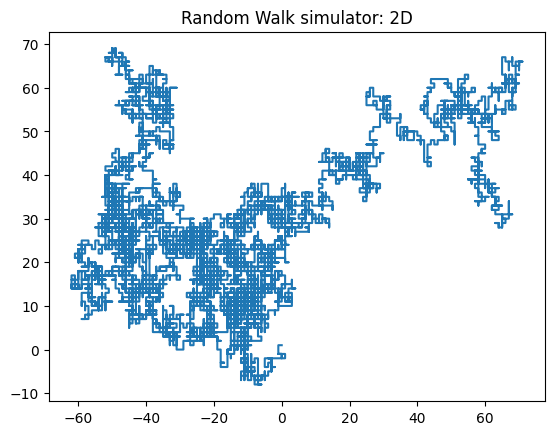

In [81]:
x_plot,y_plot = Random_Walk_2D(10000, 0 )
plt.title("Random Walk simulator: 2D")
plt.plot(x_plot, y_plot)
plt.show()

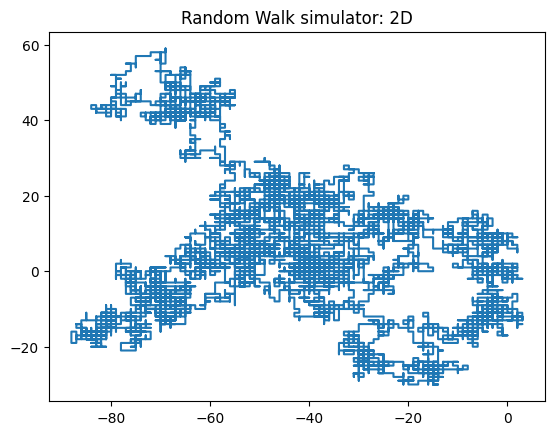

In [82]:
x_plot,y_plot = Random_Walk_2D(10000, 0 )
plt.title("Random Walk simulator: 2D")
plt.plot(x_plot, y_plot)
plt.show()

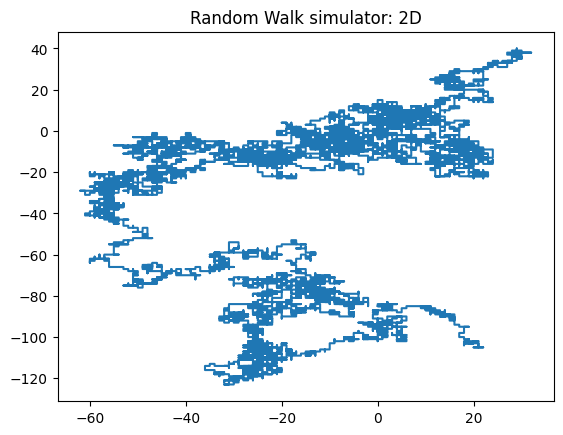

In [84]:
x_plot,y_plot = Random_Walk_2D(10000, 0 )
plt.title("Random Walk simulator: 2D")
plt.plot(x_plot, y_plot)
plt.show()

A lot of these random walks start to look fractalesque, and are recursively showing the same patterns wherever you zoom in. Also this 2D walking simulator eventually loops back on itself, which to my knowledge isn't possible in 3D.


In [100]:
def Random_Walk_2D(num_steps, start_position):
    controls = ['Up','Down','Left', 'Right']
    #storing coordinates

    y_0 = np.zeros(num_steps)
    y = y_0 + start_position
    x_0 = np.zeros(num_steps)  
    x= x_0 + start_position
    for i in range(num_steps):
        pick_step = np.random.choice(controls, p=[.7,.1,.1,.1])
        if pick_step == 'Up':
            x[i] = x[i-1]
            y[i] = y[i-1]+1
        elif pick_step == 'Down':
            x[i] = x[i-1]
            y[i] = y[i-1]-1
        elif pick_step == 'Left':
            x[i] = x[i-1]-1
            y[i] = y[i-1]
        else:
            x[i] = x[i-1]+1
            y[i] = y[i-1]
    return x,y




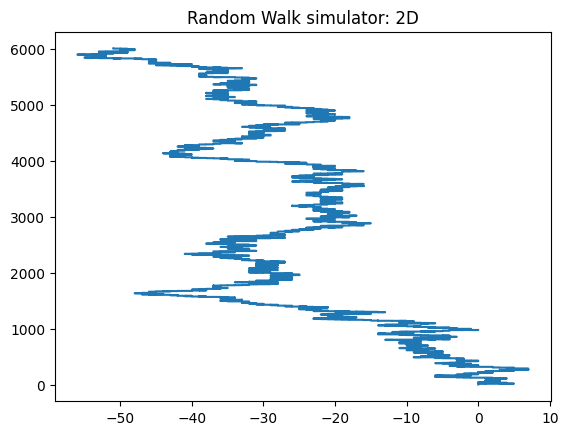

In [101]:
x_plot,y_plot = Random_Walk_2D(10000, 0 )
plt.title("Random Walk simulator: 2D")
plt.plot(x_plot, y_plot)
plt.show()

After changing the probability, the graph starts to zig zag in an almost guaranteed fashion.  

## Exercise 4
1. Create a `card` class that has two attributes: `value` and `suit`. A card should be initialized by passing it both the value and suit.
1. Create a `deck` class to represent a deck of cards.
    1. Each card in the deck should be of type card (the class you made in Step 1)
    1. Your deck should be a list of 52 cards
    1. Your deck should be ordered, and should have the option of `shuffled` (True or False) upon initialization. If `shuffled` is False, the deck should be in order (Ace-King-...-2 of Spades, Ace-King-...-2 of Clubs, Ace-King-...-2 of Diamonds, Ace-King-...-2 of Hearts), otherwise if `shuffled` is True, the deck should be randomly ordered
    1. Create a method `deal_cards(num_cards)` that chooses the **first** `num_cards` cards from the deck and returns a list of these cards. This method should also remove the cards from the deck.
    1. Create a `shuffle` method to shuffle the deck. This should return a deck object.
1. Create a subclass of `deck` called `hand`
    1. A `hand` will be a list of cards
    1. A `hand` should be initialized with an option of `num_cards` for the number of cards in the hand, and should be initialized via the `deal_cards` method of your `deck` class
    1. Create (or repurpose an old function from class/lab) a method to check if the hand is a flush, and if so determine the suit (your method should return True or False and the suit (or None if False)
    1. Create a method to check if a hand is a straight (consecutive cards; for simplicity, assume Ace is high (i.e., Ace, King, ..., 2 is the order of the numbers))
1. Using your classes, create an **unshuffled** deck, and deal 5 hands of 5 cards each. 
    1. Check if each hand is a flush, and report the results along with the suits of the flush(es). 
    1. Check if each hand is a straight and report the results
1. Create a **shuffled** deck and deal 9 hands of 5 cards. Check for straights and flushes and report the results.

In [226]:
class Card:
    def __init__(self, suit, val):
        self.suit = suit
        self.value = val
    def __str__(self):
        return self.show()
    def __repr__(self):
        return self.show()
    
    def show(self):
        if self.value == 1:
            val = "Ace"
        elif self.value == 11:
            val = "Jack"
        elif self.value == 12:
            val = "Queen"
        elif self.value == 13:
            val = "King"
        else:
            val = self.value

        return "{} of {}".format(val, self.suit)


In [229]:
class Deck:
    def __init__(self):
        self.cards = []
        self.build()


    def show(self):
        for card in self.cards:
            print(card.show())


    def build(self):
        self.cards = []
        for suit in ['Hearts', 'Clubs', 'Diamonds', 'Spades']:
            for val in range(1,14):
                self.cards.append(Card(suit, val))


    def shuffled(self, num=1):
        length = len(self.cards)
        for _ in range(num):

            for i in range(length-1, 0, -1):
                randi = random.randint(0, i)
                if i == randi:
                    continue
                self.cards[i], self.cards[randi] = self.cards[randi], self.cards[i]
    def deal(self):
        return self.cards.pop()



In [230]:
class Player(object):
    def __init__(self, name):
        self.name = name
        self.hand = []

    def draw(self, deck, num=1):
        for _ in range(num):
            card = deck.deal()
            if card:
                self.hand.append(card)
            else: 
                return False
        return True

    # Display all the cards in the players hand
    def showHand(self):
        print("{}'s hand is {}".format(self.name, self.hand))
        return self

    def discard(self):
        return self.hand.pop()

In [233]:
myDeck = Deck()
myDeck.shuffled()


bob = Player("Bob")

bob.draw(myDeck, 5)
bob.showHand()

AttributeError: type object 'Card' has no attribute 'RANKS'

## Bonus (10 points)

Using the abalone data set from Exercise 1, implement a simple classifier (for example, look up k-nearest neighbors, or kNN, classifiers in sklearn) to try to classify the data.
1. You should split the data into a training set that has labels and a testing set that does not. You may use about 80% of the data as training and 20% as testing.
1. You should report the accuracy of your classifier on both the training and testing sets.
1. Write a brief description about how the classifer you choose works to do the classification.
1. Discuss your results.